# ImageDataGenerator
普遍在訓練CNN的時候都會有資料源不足的問題，這時候可以透過『數據增強』的方式來倍增我們手上的照片，可能將照片左右反轉、加深對比或旋轉...等手段，都可以有效的擴大我們的資料集。

keras中已經有內建function\_`keras.preprocessing.image.ImageDataGenerator`可以協助我們處理數據增強的工作，也需要注意到，使用數據增強的時候，在擬合模型不是使用`fit`，而是`fit_generator`。

註：[數據增強\_AndrewNG\_deeplearning](https://hackmd.io/s/SJx83co_f#2-10Data-augmentation)  
註：[keras\_api](https://keras.io/zh/preprocessing/image/)

## Import
```python=
keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())
```

## 參數說明
### featurewise_center
defalut False  
將輸入的資料均值設置為0，逐一特徵。
### samplewise_center
default False  
將輸入的資料均值設置為0  
不同於featurewise是以總資料集來處理，samplewise只考慮自己
### featurewise_std_normalization
default False  
將輸入的資料除自身的標準差  
### samplewise_std_normalization
default False  
將輸入的資料除自身的標準差   
不同於featurewise是以總資料集來處理，samplewise只考慮自己
### zca_whitening
default False  
是否應用ZCA白化
### zca_epsilon
default 1e-6    
ZCA白化的epsilon
### rotation_range
default 0.  
照片旋轉的角度，**int**，設罝之後會以0-rotation_range區間來隨機旋轉
### width_shift_range
default 0.  
照片水平平移，**float**，設置之後於距離內水平移動
### height_shift_range
default 0.  
照片垂直平移，**float**，設置之後於距離內垂直移動
### shear_range
default 0.  
將正方形照片做有點平行四邊形的投影，**float**，會造成有點拉長、拉寬的效果    
### zoom_range
default 0.  
放大縮小照片，**float**，也可以給list，`[lower, upper] = [1-zoom_range, 1+zoom_range]`
### channel_shift_range
default 0.  
大致可以理解成是調整照片顏色
### fill_mode
default 'nearest'  
當照片縮放之後，邊界的處理方式(取自官方)  
* "constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)
* "nearest":  aaaaaaaa|abcd|dddddddd
* "reflect":  abcddcba|abcd|dcbaabcd
* "wrap":  abcdabcd|abcd|abcdabcd

### cval
default 0.  
當邊界填充為constant的時候能有效  
### horizontal_flip
default False  
隨機水平翻轉
### vertical_flip
default False  
隨機垂直翻轉
### rescale
default None  
資料重新縮放，有點像是標準化資料，將資料集乘上賦值，所以可以給值$\frac{1}{255}$
### preprocessing_function
default None
### data_format
default channels_last  
{"channels_first", "channels_last"} 

##  Method
### fit(X)
1. 僅於featurewise_center、featurewise_std_normalization、zca_whitening為True的時候需要執行。    
2. X的dimension為(m, n_H, n_W, n_C)  
    * 灰度圖的n_C設置為1。
### flow(X,y)
1. X的dimension為(m, n_H, n_W, n_C)  
    * 灰度圖的n_C設置為1。  
2. 可以透過參數save_to_dir(保存路徑)與save_prefix(檔名前綴)設置
    * 如果需求確認產生的照片
3. batch_size控制每次迭代產生多少張照片

### flow_from_directory(directory)

## 範例
對各種不同參數單一設置觀察各參數產生的結果為何

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from utility_func import *
import os 
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [2]:
img_path = './dora/'
list_img_path = []
list_img_path = os.listdir(img_path)

In [3]:
list_img_path

['dora1.jpg',
 'dora2.jpg',
 'dora3.jpg',
 'dora4.jpg',
 'dora5.jpg',
 'dora6.jpg',
 'dora7.jpg',
 'dora8.jpg']

In [4]:
X, y = image_to_matrix(img_path, list_img_path, image_exten='jpg', as_gray=False, label_num=1, gray2img=False)

In [5]:
X.shape

(8, 225, 225, 3)

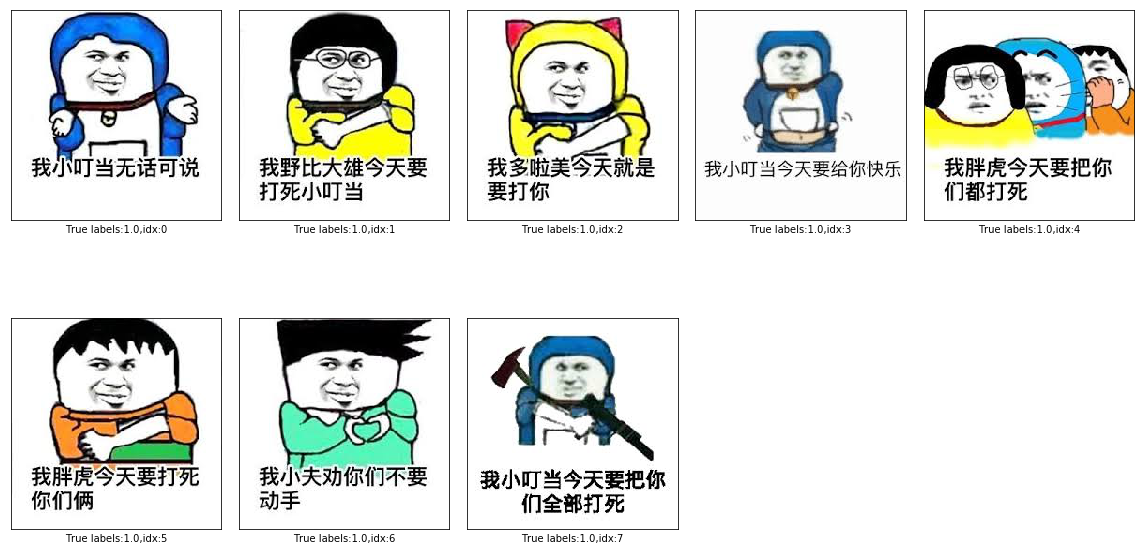

In [6]:
plt_image(X, y)

### 範例\_featurewise_center

In [7]:
img_generator = ImageDataGenerator(featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)
img_generator.fit(X)

In [37]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora2', save_format='jpeg')
X_g2_tmp = next(X_g2)

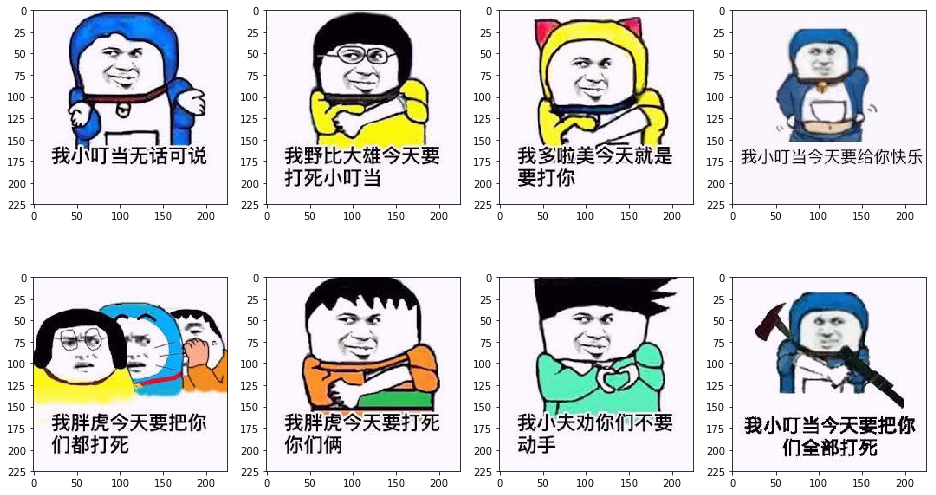

In [49]:
glob_list = glob.glob(r'.\dora\dora2_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

In [50]:
X_g2_tmp.shape

(8, 225, 225, 3)

In [51]:
X_g2_tmp.mean()

-0.26606613

In [52]:
X_g2_tmp[0].mean()

4.695483

### 範例\_featurewise_std_normalization

In [53]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)
img_generator.fit(X)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py:657: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [54]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora3', save_format='jpeg')
X_g2_tmp = next(X_g2)

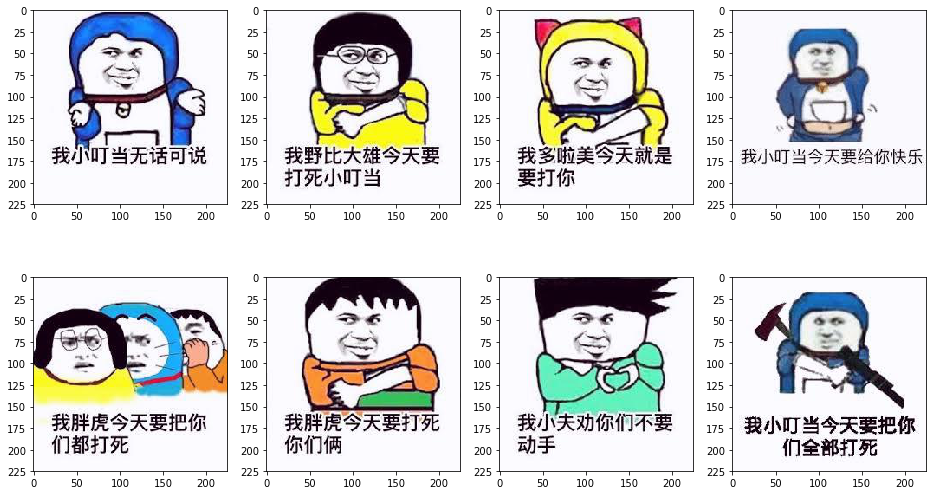

In [55]:
glob_list = glob.glob(r'.\dora\dora3_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

In [57]:
X_g2_tmp.shape

(8, 225, 225, 3)

In [58]:
X_g2_tmp.mean()

-0.0030839315

In [59]:
X_g2_tmp[0].mean()

0.054237615

### 範例\_samplewise_center
samplewise_std_normalization相同道理，不另外範例

In [60]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=True,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)
img_generator.fit(X)

In [61]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora4', save_format='jpeg')
X_g2_tmp = next(X_g2)

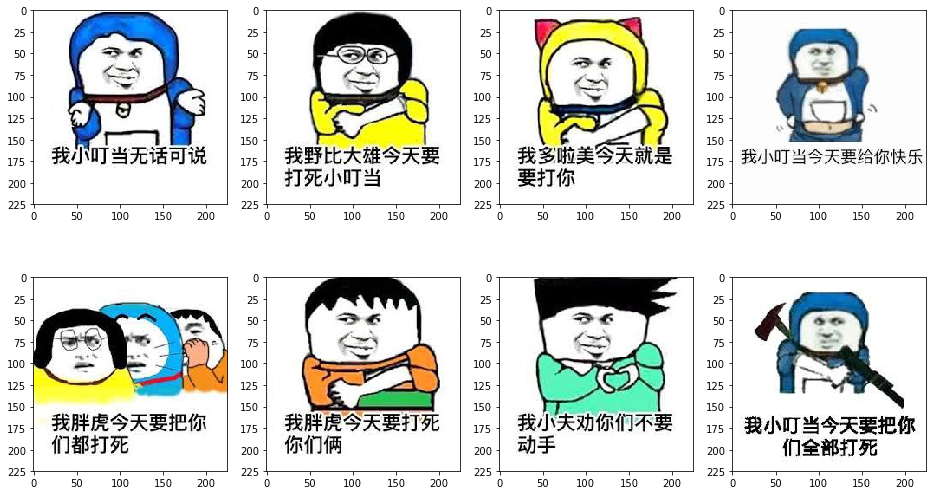

In [62]:
glob_list = glob.glob(r'.\dora\dora4_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

In [63]:
X_g2_tmp.shape

(8, 225, 225, 3)

In [64]:
X_g2_tmp.mean()

-1.2860082e-08

In [65]:
X_g2_tmp[0].mean()

-2.4691358e-06

### 範例\_zca_whitening
似乎因為照片維度較大，無法處理?

In [104]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=True,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)
img_generator.fit(X)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\preprocessing\image.py:645: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


MemoryError: 

### 範例\_rotation_range
角度測試

In [66]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=100.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [67]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora5', save_format='jpeg')
X_g2_tmp = next(X_g2)

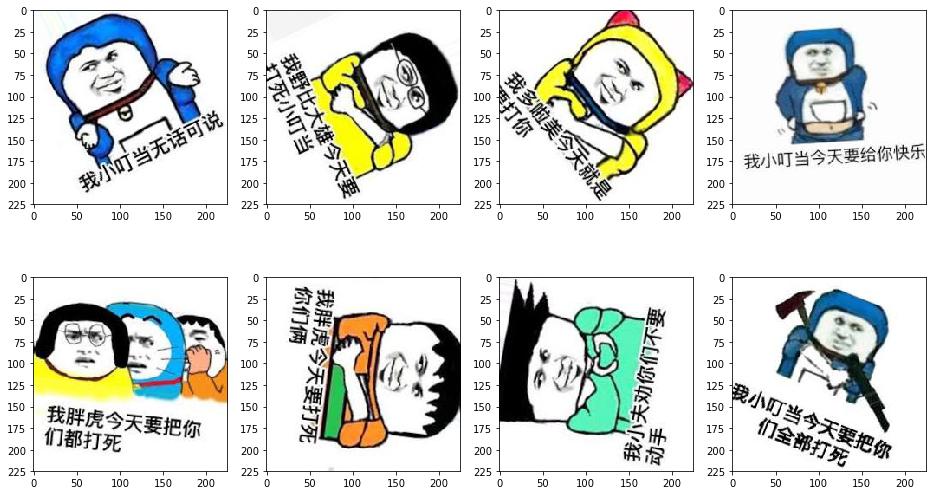

In [68]:
glob_list = glob.glob(r'.\dora\dora5_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_width_shift_range
水平平移測試

In [69]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=10.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [70]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora6', save_format='jpeg')
X_g2_tmp = next(X_g2)

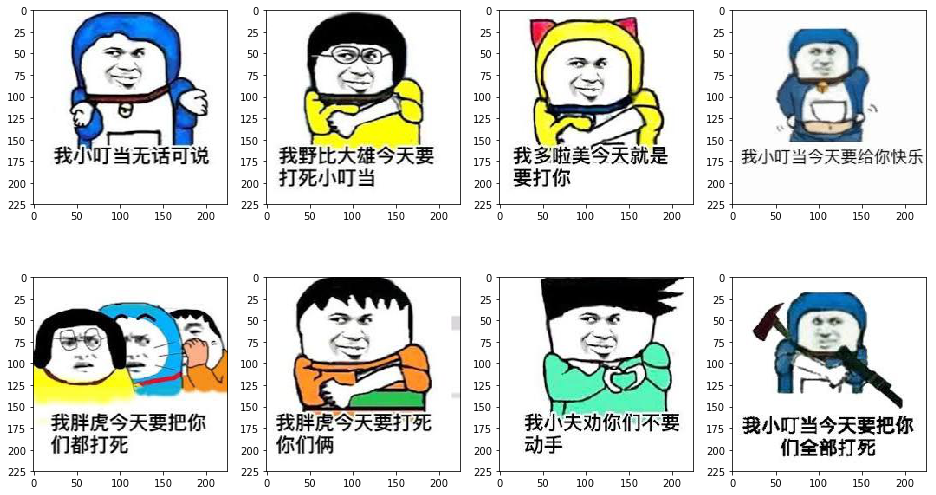

In [71]:
glob_list = glob.glob(r'.\dora\dora6_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_height_shift_range
垂直平移測試

In [72]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=20.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [73]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora7', save_format='jpeg')
X_g2_tmp = next(X_g2)

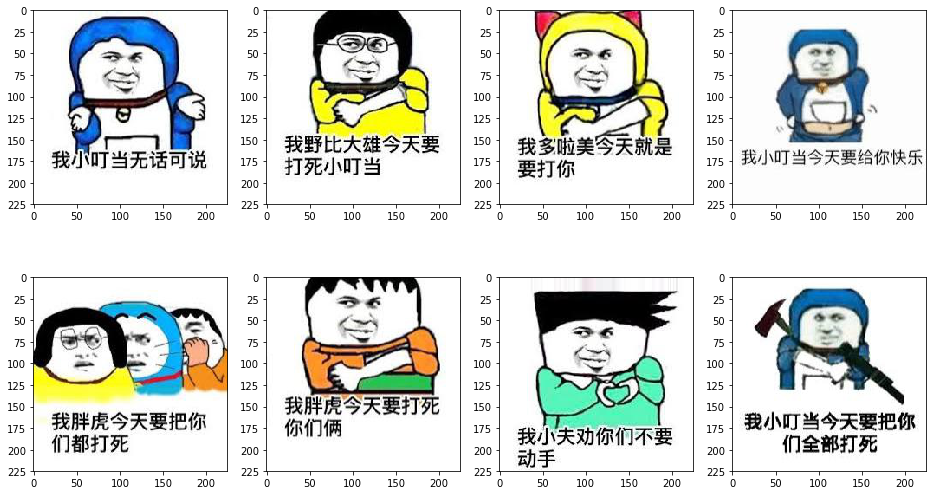

In [74]:
glob_list = glob.glob(r'.\dora\dora7_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_shear_range
平行四邊形變形測試

In [75]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=10.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [76]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora8', save_format='jpeg')
X_g2_tmp = next(X_g2)

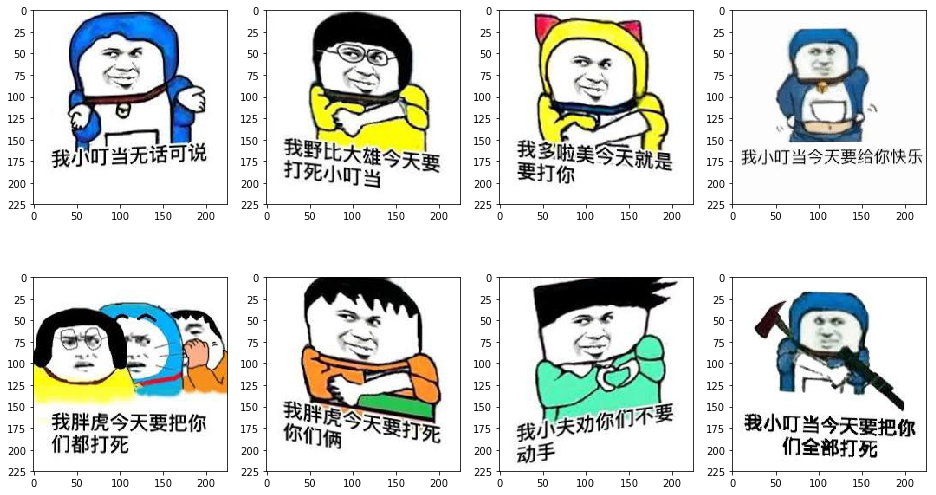

In [77]:
glob_list = glob.glob(r'.\dora\dora8_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_zoom_range
縮放測試，似乎帶反轉效果?

In [81]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=2.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [82]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora9', save_format='jpeg')
X_g2_tmp = next(X_g2)

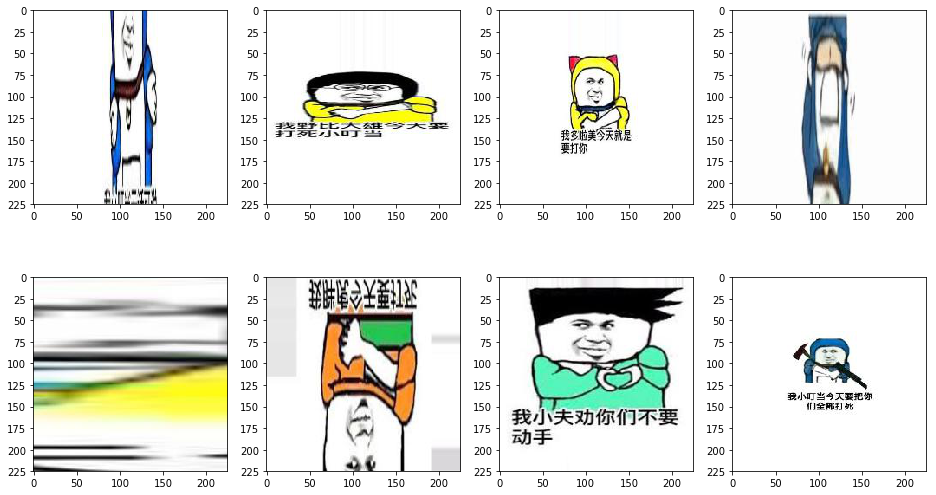

In [83]:
glob_list = glob.glob(r'.\dora\dora9_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_channel_shift_range
channel變化測試，數值愈大似乎變化較大

In [91]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=50,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [92]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora10', save_format='jpeg')
X_g2_tmp = next(X_g2)

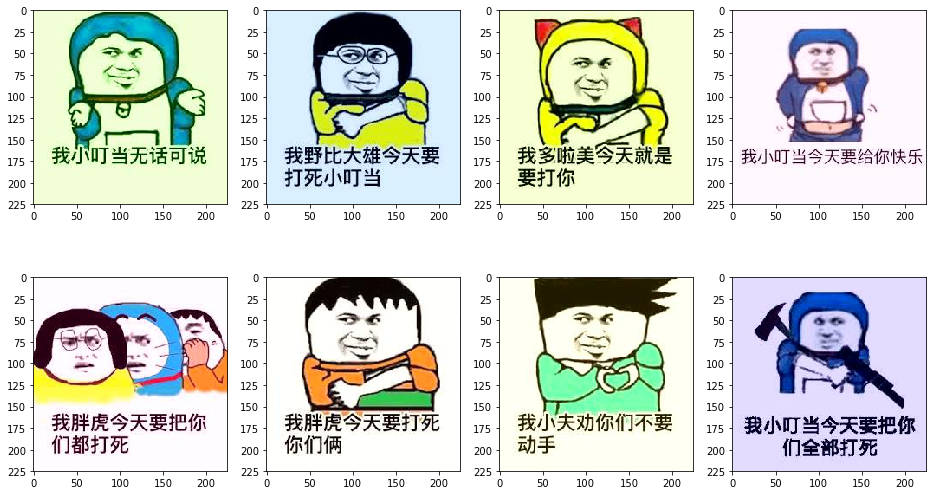

In [93]:
glob_list = glob.glob(r'.\dora\dora10_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_horizontal_flip
隨機水平翻轉

In [94]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [95]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora11', save_format='jpeg')
X_g2_tmp = next(X_g2)

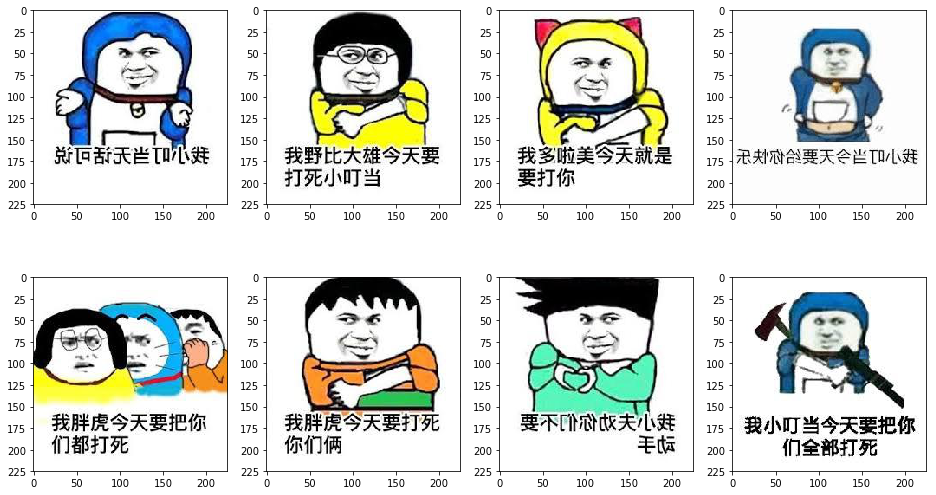

In [96]:
glob_list = glob.glob(r'.\dora\dora11_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_vertical_flip
隨機垂直翻轉

In [97]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None)

In [98]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora12', save_format='jpeg')
X_g2_tmp = next(X_g2)

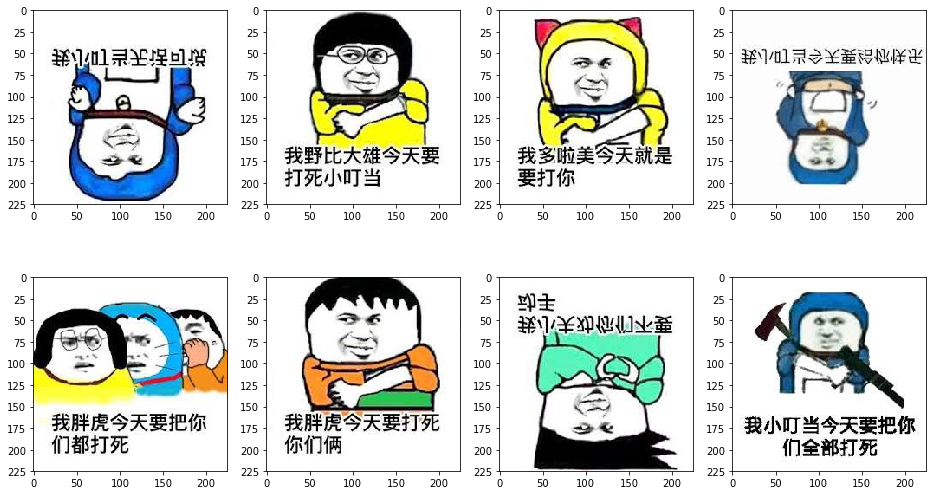

In [99]:
glob_list = glob.glob(r'.\dora\dora12_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

### 範例\_rescale
重新縮放數據

In [100]:
img_generator = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
    preprocessing_function=None)

In [101]:
X_g2 = img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora13', save_format='jpeg')
X_g2_tmp = next(X_g2)

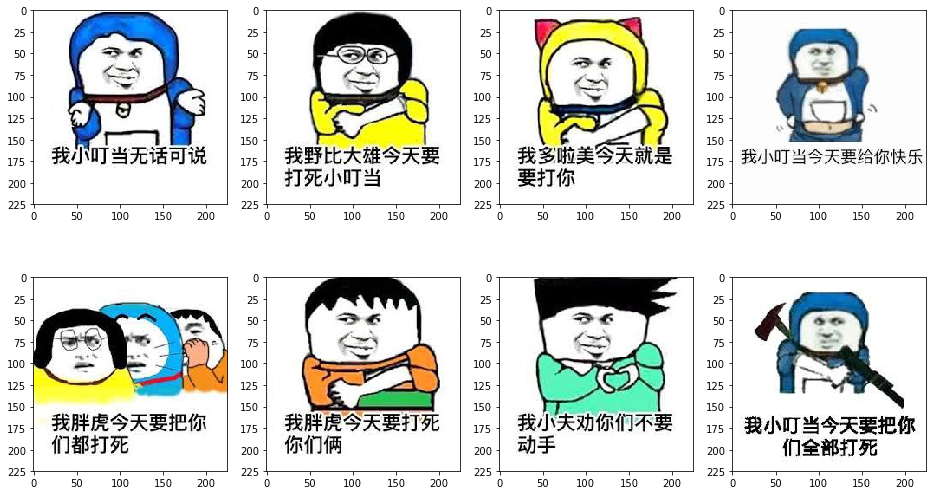

In [102]:
glob_list = glob.glob(r'.\dora\dora13_*')
plt.figure(figsize=(16,9))
for i in range(8):
    img = io.imread(glob_list[i])
    plt.subplot(241+i)
    plt.imshow(img)    
plt.tight_layout
plt.show()    

## 備註
也可以直接以迴圈來執行『圖片增強』，但是要注意到一定要break掉，否則會進入無窮迴圈，一直執行。

In [ ]:
#  每次產生8張照片，測試參數僅設置featurewise_center情況下，即使設置超過原始照片數量，每次迭代還是不會產生超過數量的照片
#  如果需要保存變化後的照片，可以透過參數設置來完成
for X_g2 in img_generator.flow(X, batch_size=16, seed=6, save_to_dir='dora/', save_prefix='dora2', save_format='jpeg'):
# for X_g2 in img_generator.flow(X, batch_size=16, seed=6):
    plt.figure(figsize=(16,9))
    for i in range(8):       
        plt.subplot(241+i)
        plt.imshow(X_g2[i])
    plt.tight_layout
    plt.show()
    #  記得break，不然它會無窮迴圈執行
    break    